In [1]:
%config Completer.use_jedi = False 

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Reading the dataset
df=pd.read_csv('classroom_actions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3829 entries, 0 to 3828
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   timestamp   3829 non-null   object
 1   id          3829 non-null   int64 
 2   group       3829 non-null   object
 3   total_days  3829 non-null   int64 
 4   completed   3829 non-null   bool  
dtypes: bool(1), int64(2), object(2)
memory usage: 123.5+ KB


In [4]:
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


### Alternative hypothesis
#### Alternative:
#### Avg (Experiment. Completed==1)-Avg (control. Completed==1)>0


In [5]:
avg_exp_completed=df.query('group=="experiment"').completed.mean()
avg_exp_completed

0.3935334872979215

In [6]:
avg_ctrl_completed=df.query('group=="control"').completed.mean()
avg_ctrl_completed

0.3719951923076923

In [7]:
altenative_diff=avg_exp_completed-avg_ctrl_completed
altenative_diff

0.02153829499022919

### Null
#### Null:
#### Avg (Experiment. Completed==1)-Avg (control. Completed==1) <=0


In [8]:
null_diff=[]
for _ in range(10000):
    sample=df.sample(df.shape[0],replace=True)
    avg_exp_completed_sample=sample.query('group=="experiment"').completed.mean()
    avg_ctrl_completed_sample=sample.query('group=="control"').completed.mean()
    null_sample_diff=avg_exp_completed_sample-avg_ctrl_completed_sample
    null_diff.append(null_sample_diff)

(array([3.000e+00, 3.000e+01, 2.810e+02, 1.121e+03, 2.604e+03, 3.176e+03,
        1.994e+03, 6.720e+02, 1.020e+02, 1.700e+01]),
 array([-0.04782437, -0.03475679, -0.02168922, -0.00862165,  0.00444593,
         0.0175135 ,  0.03058108,  0.04364865,  0.05671623,  0.0697838 ,
         0.08285138]),
 <BarContainer object of 10 artists>)

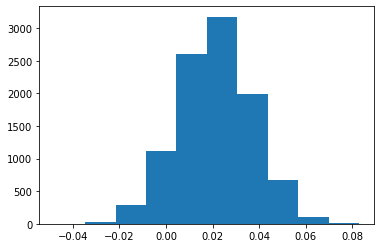

In [9]:
plt.hist(null_diff)

In [10]:
# Making the mean=0
null_diff=np.array(null_diff)
null_diff=np.random.normal(loc=0,scale=np.std(null_diff),size=null_diff.size)

### Plotting the Alternative vs Null 

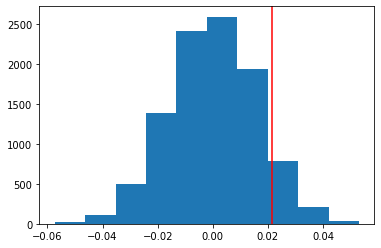

In [11]:
plt.hist(null_diff)
plt.axvline(x=altenative_diff,c='red')

### Calculating P_value

In [12]:
p_value=(null_diff>altenative_diff).mean()*100
p_value

8.62